In [46]:
tb_event_file = "/data5/antonis/neuroformer/models/tensorboard/LRN/channel/window:0.5_prev:19.5_smooth/sparse_f:None_id:None/w:0.5_wp:19.5"
# tb_event_file = "models/tensorboard/visnav/behavior_predict/long_no_classification"
tb_event_file = "/data5/antonis/neuroformer/models/tensorboard/visnav/behavior_predict"

In [86]:
import os
import glob

file_type = "events.out.tfevents"
# get all files in the directory
files = glob.glob(os.path.join(tb_event_file, "**/*events.out.tfevents*"), recursive=True)
print(len(files))

wanted_files = [
    "models/tensorboard/visnav/behavior_predict/long_no_classification/finetuning_0.1",
    "models/tensorboard/visnav/behavior_predict/long_no_classification/no_pretraining_0.1",
    "models/tensorboard/visnav/behavior_predict/classification/window:0.05_prev:0.25",
    "models/tensorboard/visnav/behavior_predict/long_no_classification/finetuning_0.01",
    "models/tensorboard/visnav/behavior_predict/long_no_classification/no_pretraining_0.01",
]

10


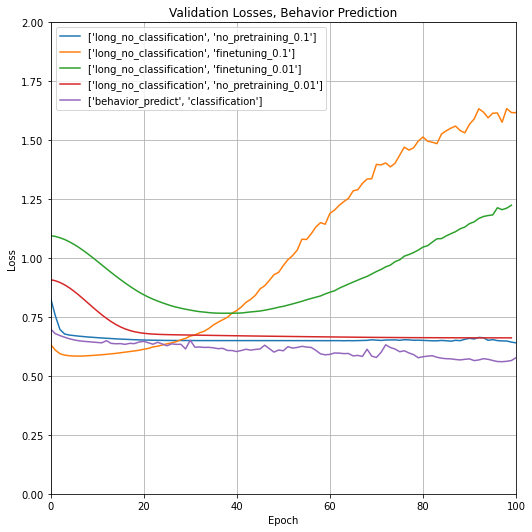

In [88]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import seaborn as sns
from neuroformer.visualize import set_plot_white
set_plot_white()

y_key = 'Loss/test_behavior'
plt.figure(figsize=(7.5, 7.5))
plt.title("Validation Losses, Behavior Prediction")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
dd_paths = []
for log_file in files:
    # if "_0.1/window" in log_file:
    #     if "no_pretraining" in log_file:
    #         label = "No Pretraining"
    #     elif "finetuning" in log_file:
    #         label = "Neural Decoding Pretraining"
    # check in the file name if it is the wanted file
    if wanted_files is not None:
        if any([x in log_file for x in wanted_files]):
            pass
        else:
            continue
    label = str(log_file.split("/")[-7:-5])
    event_accumulator = EventAccumulator(log_file)
    event_accumulator.Reload()
    tags = event_accumulator.Tags()['scalars']
    if y_key in tags:
        values = event_accumulator.Scalars(y_key)
        # plt.plot([x.step for x in values], [x.value for x in values], label=log_file)
        # if len(values) < 100:
        #     continue
        # else:
        dd_paths.append(log_file)
        df = pd.DataFrame({"epoch": [x.step for x in values], y_key: [x.value for x in values]})
        sns.lineplot(data=df, x="epoch", y=y_key, label=label)

# set x limits
plt.ylim(0, 2)
plt.xlim(0, 100)
plt.legend()

save_pth = "models/tensorboard/visnav/behavior_predict/plots"
plt.tight_layout()
plt.savefig(os.path.join(save_pth, "ft_vs_pretrain.png"), dpi=300)
plt.savefig(os.path.join(save_pth, "ft_vs_pretrain.svg"), dpi=300)

# plt.legend()

# steps = {x.step for x in event_accumulator.Scalars("epoch")}
# x = list(range(len(steps)))
# y = [x.value for x in event_accumulator.Scalars(y_key) if x.step in steps]
# df = pd.DataFrame({"epoch": x, y_key: y})
# df.to_csv(f"{y_key}.csv")

# fig, ax = plt.subplots()
# sns.lineplot(data=df, x="epoch", y=y_key)
# fig.savefig("plot.png", dpi=300)

In [10]:
# # export dd_paths to a txt file
# dest_path = "/data5/antonis/neuroformer/models/tensorboard/LRN/channel/window:0.5_prev:19.5_smooth/sparse_f:None_id:None/w:0.5_wp:19.5/best_results"

# with open(os.path.join(dest_path, "best_results.txt"), "w") as f:
#     for path in dd_paths:
#         f.write(f"{path}")

In [54]:
event_path = "/data5/antonis/neuroformer/models/tensorboard/LRN/channel/window:0.5_prev:19.5_smooth/sparse_f:None_id:None/w:0.5_wp:19.5/6_Cont:True_window:0.5_f_window:20_df:0.1_blocksize:150_conv_False_shuffle:True_batch:12_sparse_(None_None)_blocksz1150_pos_emb:False_temp_emb:True_drop:0.35_dt:True_2.0_197_max0.1_(12, 12, 12)_8_32/events.out.tfevents.1676517542.victoria.2555688.0"
event_accumulator = EventAccumulator(event_path)
event_accumulator.Reload()

tag = "Loss/test_id"

tag in event_accumulator.Tags()
event_accumulator.Scalars(tag)

[ScalarEvent(wall_time=1676518580.3071182, step=0, value=2.5878143310546875),
 ScalarEvent(wall_time=1676519613.6354015, step=1, value=2.576871871948242),
 ScalarEvent(wall_time=1676520645.2366073, step=2, value=2.564875841140747),
 ScalarEvent(wall_time=1676521677.6774397, step=3, value=2.549067497253418),
 ScalarEvent(wall_time=1676522718.0282004, step=4, value=2.5302557945251465),
 ScalarEvent(wall_time=1676523757.2140446, step=5, value=2.5089457035064697),
 ScalarEvent(wall_time=1676524786.3965378, step=6, value=2.4854586124420166)]

In [37]:
event_accumulator.Tags()['scalars']

['model/no_parameters',
 'Loss/train_clip',
 'Loss/train_id',
 'Loss/train_time',
 'Loss/train_total',
 'Score/train_precision',
 'Score/train_recall',
 'Score/train_F1',
 'Loss/test_clip',
 'Loss/test_id',
 'Loss/test_time',
 'Loss/test_total',
 'Score/test_precision',
 'Score/test_recall',
 'Score/test_F1']